**We leverage past data to predict future trends in Arpassenger traffic**

In [2]:
!pip install statsmodels
!pip install scikit-learn



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
from pandas import read_csv
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt

In [9]:
df2=pd.read_csv('C:/classisificatn and regressin/AirPassengers.csv',header=0,index_col=0,parse_dates=[0]) 

In [10]:
df2.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


**Create Lagged Variable 't' and Calculate Residuals**

In [22]:
df2['t'] = df2['#Passengers'].shift(1)

In [23]:
df2['Resid'] = df2['#Passengers'] - df2['t']

In [24]:
df2.head()

,#Passengers,t,Resid
Month,,,
1949-02-01,118,NaN,NaN
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0
1949-06-01,135,121.0,14.0


In [27]:
df2.shape

(143, 3)

**Prepare data for training and testing**

In [31]:
df2.shape[0]-7
new_train, new_test = df2.Resid[1:df2.shape[0]-7], df2.Resid[df2.shape[0]-7:]
#This approach is useful when you want a fixed number of observations in the test set (in this case, 7) rather than a specific percentage

In [32]:
new_train.head()

Month
1949-03-01    14.0
1949-04-01    -3.0
1949-05-01    -8.0
1949-06-01    14.0
1949-07-01    13.0
Name: Resid, dtype: float64

In [33]:
new_test.head()

Month
1960-06-01    63.0
1960-07-01    87.0
1960-08-01   -16.0
1960-09-01   -98.0
1960-10-01   -47.0
Name: Resid, dtype: float64

**Fit an Autoregressive Model with Lag of 29**

In [35]:
new_model = AutoReg(new_train, lags=29)
new_model_fit = new_model.fit()

C:\Users\maina\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


**Make Predictions on Test Data Residuals**

In [37]:
print('Coefficients:%s' %new_model_fit.params)

Coefficients:const        7.156572
Resid.L1    -0.439200
Resid.L2    -0.103548
Resid.L3    -0.130387
Resid.L4    -0.228027
Resid.L5     0.002623
Resid.L6    -0.142071
Resid.L7    -0.032436
Resid.L8    -0.143311
Resid.L9     0.173312
Resid.L10   -0.299587
Resid.L11   -0.236539
Resid.L12    0.492806
Resid.L13    0.237682
Resid.L14   -0.128476
Resid.L15    0.118950
Resid.L16   -0.056312
Resid.L17   -0.145927
Resid.L18   -0.209264
Resid.L19   -0.146284
Resid.L20   -0.215327
Resid.L21   -0.335635
Resid.L22   -0.054089
Resid.L23    0.189873
Resid.L24    0.264695
Resid.L25    0.237690
Resid.L26   -0.138470
Resid.L27   -0.139014
Resid.L28   -0.009733
Resid.L29    0.062046
dtype: float64


In [43]:
new_pred_resid = new_model_fit.predict(start=len(new_train), end=len(new_train)+len(new_test)-1).dropna()
#predictions will begin immediately after the training data
#Starting right after the training data,Covering the full length of the test data,Cleaning up NaN values for accurate evaluation and further processing.

C:\Users\maina\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\deterministic.py:308: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


In [44]:
new_pred_resid

1960-06-01     77.526373
1960-07-01     79.429150
1960-08-01     -4.865091
1960-09-01   -103.131138
1960-10-01    -94.864589
1960-11-01    -31.817423
1960-12-01     23.423143
Freq: MS, dtype: float64

**combine predictions with lagged values**

In [45]:
new_predictions = df2.t[df2.shape[0]-7:] + new_pred_resid
new_predictions

Month
1960-06-01    549.526373
1960-07-01    614.429150
1960-08-01    617.134909
1960-09-01    502.868862
1960-10-01    413.135411
1960-11-01    429.182577
1960-12-01    413.423143
dtype: float64

**RMSE between the actual new_test and predicted new_predictions**

In [46]:
rmse = sqrt(mean_squared_error(new_test, new_predictions))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 517.778


**generate a line plot**

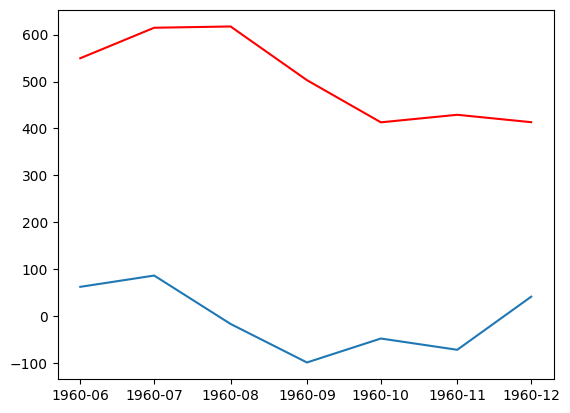

In [52]:
pyplot.plot(new_test)
pyplot.plot(new_predictions, color='red')